# Convolutional Networks + Dense applied in IWR using Spectrograms

    Author: Fernanda Ferreira
    Professor: Tiago F. Tavares
    
    date: 02/2019

## Import Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import glob
import librosa
import librosa.display as ld
# Printa todos os valores do array
#np.set_printoptions(threshold=np.inf)
np.set_printoptions(threshold=10)
import pandas as pd
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
import keras

/home/fernanda/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## To load audios

In [2]:
data = glob.glob('fernanda_audios/*.wav')
#data - glob.glob('1seg/fold1/')
#data = glob.glob('../../Projeto_phd/academia/*.wav')

In [3]:
len_audios = []
audios = []

for file in sorted(data):
    audio, sr = librosa.core.load(file, sr=None, mono=True, offset=0.0, duration=None)
    len_audios.append(len(audio))
    audios.append(audio)
    max_audio = max(len_audios)

In [4]:
#print (len_audios)   
#print (max(len_audios))
#print (np.argmax(len_audios))
#print (sr)
#print (len(audios))
#print (max_audio)
#print (audios[0].shape)

In [5]:
hop_length = 400
n_fft = 500

#To convert the hop length and frame size to units of seconds:
print ("hop length[s]:", float(hop_length)/sr) # units of seconds
print ("frame size[s]:",float(n_fft)/sr) # units of seconds

audios_resize = []
specs = []

for i in range(len(audios)):
    shape = (max(len_audios))
    i_audio = np.array(audios[i])
    i_audio.resize(shape)
    x = librosa.stft(i_audio, n_fft=n_fft, hop_length=hop_length)
    X = librosa.amplitude_to_db(np.abs(x), ref=np.max)
    specs.append(X)
    audios_resize.append(i_audio)

#Librosa.stft return:
#np.ndarray [shape=(1 + n_fft/2, t), dtype=dtype]

hop length[s]: 0.009070294784580499
frame size[s]: 0.011337868480725623


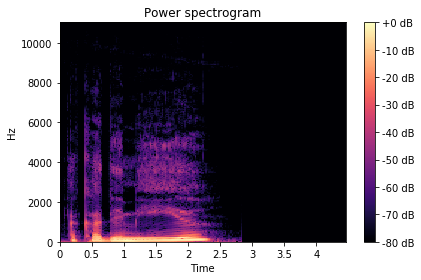

In [6]:
#plt.figure(figsize=(20,15))
#plt.imshow(specs[30])

ld.specshow(specs[0],y_axis='linear', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

In [7]:
#print (specs[0].shape)
#print (len(specs))
#print (type(specs))
specs = np.array(specs)
#print (type(specs))

#print (specs[0])

## To load Labels

In [8]:
l = pd.read_csv('fernanda_audios/label.csv', sep=';')
l.head(5)
#file = open('datasets/fernando_falas/labels.txt', 'r')
#print (file.read())

,audio,label
0,academia1.wav,ACADEMIA
1,academia2.wav,ACADEMIA
2,academia3.wav,ACADEMIA
3,academia4.wav,ACADEMIA
4,academia5.wav,ACADEMIA


In [9]:
l_col = l['label']
l_col.head(5)

0    ACADEMIA
1    ACADEMIA
2    ACADEMIA
3    ACADEMIA
4    ACADEMIA
Name: label, dtype: object

In [10]:
#l_academia = l_col[0:400]
#l_academia
#print (len(l_academia))
#print (specs[0].shape)

In [11]:
# Need not be sorted, necessarily
#a = (0, 1, 1, 1, 2, 3, 7, 7, 23)

def count_elements(seq) -> dict:
    """Tally elements from `seq`."""
    hist = {}
    for i in seq:
        hist[i] = hist.get(i, 0) + 1
    return hist

#counted = count_elements(a)
#counted

l_count = count_elements(l_col)
l_count

{'ACADEMIA': 400,
 'AEROPORTO': 400,
 'CASA': 400,
 'CINEMA': 400,
 'ESCOLA': 400,
 'FACULDADE': 400,
 'FARMACIA': 400,
 'HOSPITAL': 400,
 'MERCADO': 400,
 'TRABALHO': 400}

## To separate 80% to train and 20% to test

In [12]:
#stratify: certifica a mesma quantidade de audios de cada classe.
x_train, x_test, y_train, y_test = train_test_split(specs, l_col, test_size=0.2, random_state=42, stratify=l_col)
#x_train, x_test, y_train, y_test = train_test_split(specs, l_academia, test_size=0.2, random_state=42, stratify=l_academia)

#print (type(x_train))

In [13]:
#y_train_count = count_elements(y_train_bi)
#print (y_train_count)
#y_test_count = count_elements(y_test_bi)
#print (y_test_count)

#print (type(y_train[0]))

## Transform labels in binary

In [14]:
#print (type(y_train))
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)
x_train_np = np.array(x_train)
x_test_np = np.array(x_test)
#print (y_train_np)

# convert class vectors to binary class matrices
def string_to_binary(lista):
    
    for i in range(len(lista)):
        if lista[i] == 'ACADEMIA':
            lista[i] = 0
        elif lista[i] == 'AEROPORTO':
            lista[i] = 1
        elif lista[i] == 'CASA':
            lista[i] = 2
        elif lista[i] == 'CINEMA':
            lista[i] = 3
        elif lista[i] == 'ESCOLA':
            lista[i] = 4
        elif lista[i] == 'FACULDADE':
            lista[i] = 5
        elif lista[i] == 'FARMACIA':
            lista[i] = 6
        elif lista[i] == 'HOSPITAL':
            lista[i] = 7
        elif lista[i] == 'MERCADO':
            lista[i] = 8
        elif lista[i] == 'TRABALHO':
            lista[i] = 9
    return lista


In [15]:
y_train_bi = string_to_binary(y_train_np)
print (y_train_bi)

y_test_bi = string_to_binary(y_test_np)
print (y_test_bi)

print (x_train_np.shape)

[1 5 6 ... 0 5 9]
[4 6 9 ... 5 6 5]
(3200, 251, 192)


# Conv2D + Maxpooling + Dense building

In [16]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv1D
from keras import backend as K

# Versão2

In [17]:
print (x_train_np.shape)
print (x_test_np.shape)
print (y_train_np.shape)
print (y_test_np.shape)

(3200, 251, 192)
(800, 251, 192)
(3200,)
(800,)


In [18]:
# input image dimensions
img_rows = x_train_np.shape[1]
img_cols = x_train_np.shape[2]

if K.image_data_format() == 'channels_first':
    x_train_np = x_train_np.reshape(x_train_np.shape[0], 1, img_rows, img_cols)
    x_test_np = x_test_np.reshape(x_test_np.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train_np = x_train_np.reshape(x_train_np.shape[0], img_rows, img_cols, 1)
    x_test_np = x_test_np.reshape(x_test_np.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train_np = x_train_np.astype('float32')
x_test_np = x_test_np.astype('float32')
x_train_np /= 255
x_test_np /= 255
print('x_train shape:', x_train_np.shape)
print(x_train_np.shape[0], 'train samples')
print(x_test_np.shape[0], 'test samples')
print (input_shape)

print ('y_train shape:', y_train_bi.shape)

num_classes = 10
y_train_np = keras.utils.to_categorical(y_train_bi, num_classes)
y_test_np = keras.utils.to_categorical(y_test_bi, num_classes)

print ('y_train shape:', y_train_np.shape)

x_train shape: (3200, 251, 192, 1)
3200 train samples
800 test samples
(251, 192, 1)
y_train shape: (3200,)
y_train shape: (3200, 10)


In [19]:
batch_size = 20
epochs = 50

In [20]:
model = Sequential()
# Input Layer
input_shape=input_shape
# Hidden Layer
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
# Output Layer
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 249, 190, 16)      160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 124, 95, 16)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 122, 93, 16)       2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 61, 46, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 59, 44, 16)        2320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 29, 22, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 27, 20, 16)        2320      
__________

In [21]:
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [22]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
#model.compile(loss='categorical_crossentropy', metrics=[f1], optimizer='adam')
#model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='sgd')

In [23]:
history = model.fit(x_train_np, y_train_np,
                    batch_size=batch_size, epochs=epochs, verbose=1,
                    validation_data=(x_test_np, y_test_np), callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=5,
                              verbose=0, mode='auto')])


Train on 3200 samples, validate on 800 samples
Epoch 1/50
3200/3200 [==============================] - 30s 9ms/step - loss: 1.7214 - acc: 0.3572 - val_loss: 0.6705 - val_acc: 0.7587
Epoch 2/50
3200/3200 [==============================] - 18s 6ms/step - loss: 0.3897 - acc: 0.8766 - val_loss: 0.2377 - val_acc: 0.9275
Epoch 3/50
3200/3200 [==============================] - 18s 6ms/step - loss: 0.1653 - acc: 0.9494 - val_loss: 0.1417 - val_acc: 0.9650
Epoch 4/50
3200/3200 [==============================] - 18s 6ms/step - loss: 0.0887 - acc: 0.9731 - val_loss: 0.1034 - val_acc: 0.9662
Epoch 5/50
3200/3200 [==============================] - 18s 6ms/step - loss: 0.0561 - acc: 0.9831 - val_loss: 0.1238 - val_acc: 0.9575
Epoch 6/50
3200/3200 [==============================] - 18s 6ms/step - loss: 0.0379 - acc: 0.9878 - val_loss: 0.0685 - val_acc: 0.9787
Epoch 7/50
3200/3200 [==============================] - 18s 6ms/step - loss: 0.0181 - acc: 0.9956 - val_loss: 0.0841 - val_acc: 0.9725
Epoch 8/

In [24]:
score = model.evaluate(x_test_np, y_test_np, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



Test loss: 0.046012106752896215
Test accuracy: 0.98875


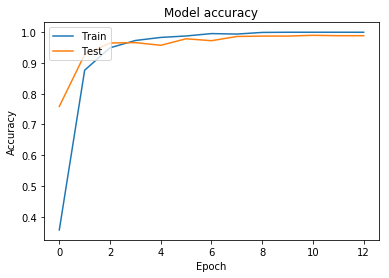

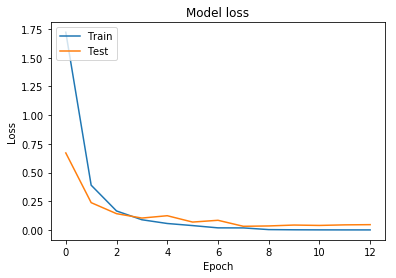

In [25]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## References

- https://stackoverflow.com/questions/43906048/keras-early-stopping
- https://keras.io/callbacks/